In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from classes.ProcessingData import ProcessingData as mpd
import numpy as np

In [3]:
df = mpd.getCsvData("bank.csv",";")
df = mpd.hotCoding(df)
# we pull the data from the table and coding it with the hot coding 

C:\Users\DELL\Desktop\githubTPs\MLP-classification-\classes\ProcessingData.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"yes": 1, "no": 0})


In [4]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,1,-3313,1,1,9,153,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,0,295,0,0,19,151,11,-1,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,0,1137,0,0,6,129,4,211,3,...,0,0,0,0,0,0,0,1,0,0


In [20]:
from tensorflow.keras.layers import Input, Dense
model = Sequential([Input(shape=(df.shape[1]-1,)),
    Dense(16, activation='linear'),# linear function is a function leave the value as is
    Dense(1, activation='sigmoid')])# sigmoid function is a function get makes the values between 0 and 1

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
X = df.drop(columns=['y'])
y = df['y']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7666 - loss: 18.3858 - val_accuracy: 0.8950 - val_loss: 0.6978
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 1.3147 - val_accuracy: 0.8398 - val_loss: 0.8464
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8475 - loss: 1.2667 - val_accuracy: 0.8688 - val_loss: 0.3593
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 0.8752 - val_accuracy: 0.8619 - val_loss: 0.5460
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8530 - loss: 0.8518 - val_accuracy: 0.8895 - val_loss: 0.7484
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8582 - loss: 1.0497 - val_accuracy: 0.8964 - val_loss: 0.4929
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8396 - loss: 1.5895 - val_accuracy: 0.8936 - val_loss: 0.9915
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8651 - loss: 0.8160 - val_accuracy: 0

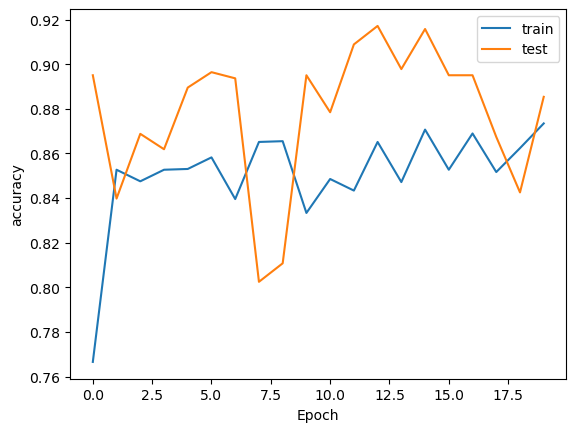

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


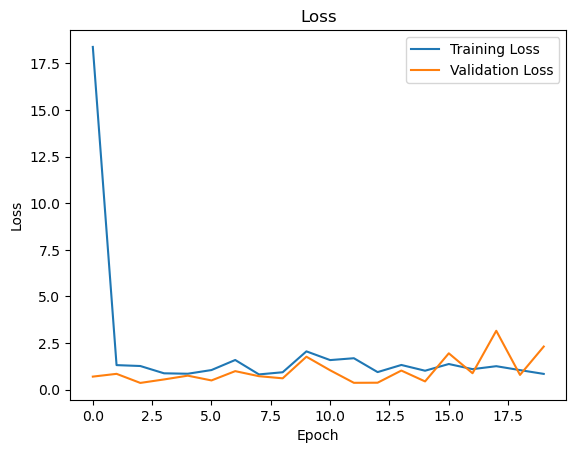

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()